In [1]:
# Library Imports
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Read the CSV file
df= pd.read_csv("HousePricePrediction.csv",encoding= 'unicode_escape')

In [3]:
df.shape

(2919, 13)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [6]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(2919, 13)

In [8]:
# Remove the 'Id' column from the DataFrame
df.drop(columns = ['Id'],inplace= True)

In [9]:
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [10]:
# Calculate the total count of missing (NaN) values for every column in the DataFrame
df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [11]:
# Generate summary statistics for all numerical columns in the DataFrame.
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


<Axes: ylabel='LotArea'>

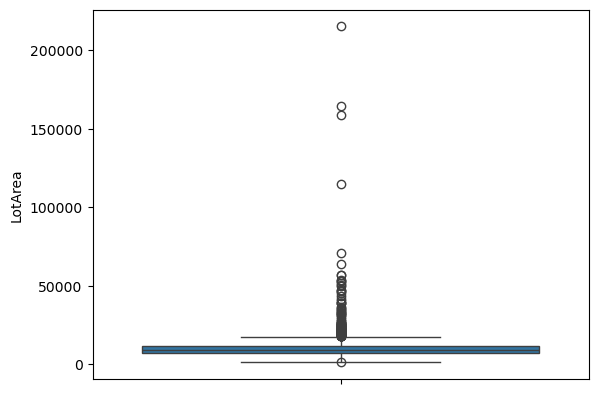

In [12]:
# Create a box plot of the 'LotArea' column using the Seaborn library.
sns.boxplot(df, y = 'LotArea')

In [13]:
Q1 = np.percentile(df['LotArea'], 25, interpolation = 'midpoint') # Calculate the first quartile
Q3 = np.percentile(df['LotArea'], 75, interpolation = 'midpoint') # Calculate the third quartile

IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR)

In [14]:
lowerBound = Q1 - 1.5 * IQR # Calculate the lower boundary for outlier detection.
upperBound = Q3 + 1.5 * IQR # Calculate the upper boundary for outlier detection.

In [15]:
# Update the DataFrame by removing the outliers by IQR Method
df = df[(df.LotArea < upperBound) & (df.LotArea > lowerBound)]

In [16]:
df.shape

(2791, 12)

In [17]:
imputer = SimpleImputer(strategy='mean') # Initialize a SimpleImputer object.
imputer.fit(df[['SalePrice']]) #  Filling NaN/Missing values in SalePrice column with the Mean of SalePrice column.

SimpleImputer()

In [18]:
# Transform the 'SalePrice' column using the fitted imputer.
df['SalePrice'] = imputer.transform(df[['SalePrice']])

In [19]:
# Re-check the count of missing values for every column in the DataFrame.
df.isna().sum()

MSSubClass      0
MSZoning        1
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [20]:
# Fill all remaining missing (NaN) values in the entire DataFrame with the value 0.
df = df.fillna(0)

In [21]:
# Re-check the count of missing values for every column in the DataFrame.
df.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [22]:
# Display a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2791 non-null   int64  
 1   MSZoning      2791 non-null   object 
 2   LotArea       2791 non-null   int64  
 3   LotConfig     2791 non-null   object 
 4   BldgType      2791 non-null   object 
 5   OverallCond   2791 non-null   int64  
 6   YearBuilt     2791 non-null   int64  
 7   YearRemodAdd  2791 non-null   int64  
 8   Exterior1st   2791 non-null   object 
 9   BsmtFinSF2    2791 non-null   float64
 10  TotalBsmtSF   2791 non-null   float64
 11  SalePrice     2791 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 283.5+ KB


In [23]:
# Selects columns with the data type 'object'
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [24]:
# Convert all categorical columns to string type
for col in cat_cols:
    df[col] = df[col].astype(str)

In [25]:
# Now run the encoder fit method
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [26]:
# Retrieve the names of the new binary columns created by the OneHotEncoder
encoded_cols = encoder.get_feature_names_out(cat_cols)
encoded_cols

array(['MSZoning_0', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'], dtype=object)

In [27]:
# Apply the fitted OneHotEncoder to the categorical columns.
df[encoded_cols] = encoder.transform(df[cat_cols])

In [28]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Remove the original categorical columns.
df.drop(columns=cat_cols, inplace=True)

In [30]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_0,MSZoning_C (all),...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,1526,5,1970,1970,0.0,546.0,178065.792385,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,1936,7,1970,1970,0.0,546.0,178065.792385,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,178065.792385,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,178065.792385,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Display all column names in the final DataFrame.
df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_0',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [32]:
X = df.drop(columns = 'SalePrice') # Create the feature matrix (X) by dropping the target column ('SalePrice') from the DataFrame.
y = df['SalePrice'] # Create the target vector (y) by selecting only the 'SalePrice' column.

In [33]:
scaler = MinMaxScaler() # Initialize the MinMaxScaler object.

scaler.fit(X) # Fit the scaler on the feature matrix (X).

MinMaxScaler()

In [34]:
# Transform the entire feature matrix (X) using the minimum and maximum values calculated in the previous step.
X[:] = scaler.transform(X)

In [35]:
X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_0,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.235294,0.430838,0.500,0.949275,0.883333,0.0,0.266999,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.501821,0.875,0.753623,0.433333,0.0,0.393637,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.603666,0.500,0.934783,0.866667,0.0,0.286962,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.294118,0.498735,0.500,0.311594,0.333333,0.0,0.235808,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.789457,0.500,0.927536,0.833333,0.0,0.357143,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.823529,0.003457,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,0.823529,0.028764,0.750,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.823529,0.026171,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,0.382353,0.553731,0.500,0.869565,0.700000,0.0,0.284467,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Split the feature matrix (X) and target vector (y) into four parts:
# - X_train, y_train: Used to train the machine learning model (80% of data).
# - X_test, y_test: Used to evaluate the model's performance on unseen data (20% of data).
# test_size=0.2 specifies that 20% of the data should be reserved for testing.
# random_state=42 ensures the data split is the same every time the code is run, making the results reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2232, 38), (559, 38), (2232,), (559,))

In [37]:
model = LinearRegression() # Initialize the Linear Regression model object from scikit-learn.

model.fit(X_train, y_train) # Train (fit) the Linear Regression model.

LinearRegression()

In [38]:
# Use the trained Linear Regression model (`model`) to generate predicted house prices (`y_pred`) based on the unseen test features (`X_test`).
y_pred = model.predict(X_test)

In [39]:
# Display the first 10 actual house prices from the test set (`y_test`).
y_test[:10]

2888    178065.792385
2364    178065.792385
2075    178065.792385
2564    178065.792385
2216    178065.792385
145     130000.000000
1052    165000.000000
2736    178065.792385
1755    178065.792385
339     155000.000000
Name: SalePrice, dtype: float64

In [40]:
# Display the first 10 predicted house prices generated by the trained Linear Regression model (`y_pred`).
y_pred[:10]

array([1.18008000e+05, 1.85016000e+05, 1.42120000e+05, 1.17248000e+05,
       5.74614166e+16, 1.88840000e+05, 1.72424000e+05, 1.58328000e+05,
       1.47336000e+05, 1.91392000e+05])

In [41]:
# Calculate the Mean Absolute Error (MAE) by comparing the actual prices (`y_test`) with the predicted prices (`y_pred`).
mean_absolute_error(y_test, y_pred)

116487068910033.19

In [42]:
# Import the Lasso Regression model from scikit-learn.
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=50, max_iter=100, tol = 0.1) # Initialize the Lasso model with hyperparameters

lasso_reg.fit(X_train, y_train) # Train (fit) the Lasso Regression model using the scaled training data (X_train and y_train).

Lasso(alpha=50, max_iter=100, tol=0.1)

In [43]:
# Use the trained Lasso Regression model (`lasso_reg`) to generate predicted house prices (`lasso_pred`) for the unseen test features (`X_test`).
lasso_pred = lasso_reg.predict(X_test) 

mean_absolute_error(y_test, lasso_pred) # Calculate and display the **Mean Absolute Error (MAE)** for the Lasso model.

30208.745100437296

In [44]:
# Import the Ridge Regression model from scikit-learn.
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol = 0.1) # Initialize the Ridge model with hyperparameters.

ridge_reg.fit(X_train, y_train) # Train (fit) the Ridge Regression model using the scaled training data (X_train and y_train).

Ridge(alpha=50, max_iter=100, tol=0.1)

In [45]:
# Use the trained Ridge Regression model (`ridge_reg`) to generate predicted house prices (`ridge_pred`) for the unseen test features (`X_test`).
ridge_pred = ridge_reg.predict(X_test)

mean_absolute_error(y_test, ridge_pred) # Calculate and display the Mean Absolute Error (MAE) for the Ridge model.

29906.491518276922

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pickle


X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

# Save model
pickle.dump(model, open("house_price_model.pkl", "wb"))
print("Model saved as house_price_model.pkl")


R2 Score: 0.323908827506428
MAE: 30210.77972380365
RMSE: 43640.68389689312
Model saved as house_price_model.pkl


In [50]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'MSZoning_0', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')